In [54]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import glob
import random
import shutil
import matplotlib.pyplot as plt


In [20]:
shapes = ["Star" , "Square" , "Circle" , "Triangle"]

if os.path.isdir('train/square') is False :
  for shape in shapes :
    os.makedirs(f'train/{shape}')
    os.makedirs(f'valid/{shape}')
    os.makedirs(f'test/{shape}')

In [19]:
os.getcwd()

'/content/drive/MyDrive/WOrk/vortex_classification/output'

In [31]:
len(glob.glob('Circle*'))

500

In [32]:
for shape in shapes :
  for img in random.sample(glob.glob(f'{shape}*') , 350):
    shutil.move(img , f'train/{shape}')
  for img in random.sample(glob.glob(f'{shape}*') , 50):
    shutil.move(img , f'valid/{shape}')
  for img in random.sample(glob.glob(f'{shape}*') , 100):
    shutil.move(img , f'test/{shape}')


In [38]:
len(os.listdir('test/Square'))

100

In [39]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [61]:
train_data = ImageDataGenerator().flow_from_directory(directory=train_path , target_size=(224 , 224) , batch_size=10)
valid_data = ImageDataGenerator().flow_from_directory(directory=valid_path , target_size=(224 , 224) , batch_size=10)
test_data = ImageDataGenerator().flow_from_directory(directory=test_path , target_size=(224 , 224) , batch_size=10)


Found 1400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [43]:
def plot_images(images):

    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(20 , 20))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis("off")

    plt.show()

In [44]:
imgs , labels = next(train_data)

In [48]:
print(labels)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


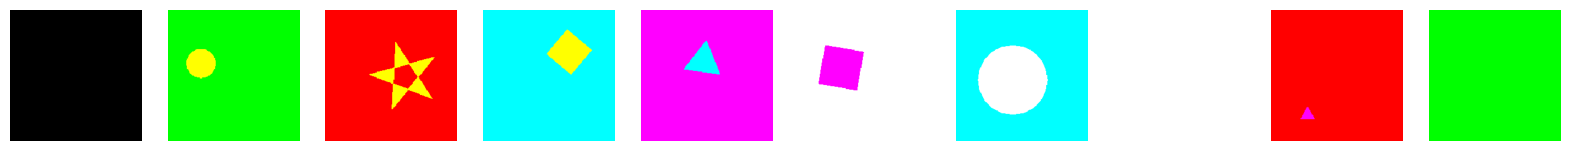

In [49]:
plot_images(imgs)

In [67]:
model = Sequential([
    Conv2D(filters = 64 , kernel_size=(3, 3) , activation='relu' , padding = 'same' , input_shape = (224 , 224 , 3)),
    MaxPool2D(pool_size=(2 , 2), strides = 2),
    Conv2D(filters = 64 , kernel_size=(3, 3) , activation='relu' , padding = 'same'),
    MaxPool2D(pool_size=(4 , 4), strides = 4),
    Flatten(),
    Dense(units = 4 , activation="softmax")
])

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                

In [69]:
model.compile(optimizer=Adam(learning_rate=0.0001) , loss = "categorical_crossentropy" , metrics=['accuracy'])

In [70]:
with tf.profiler.experimental.Profile('.'):
  model.fit(x = train_data , validation_data=valid_data , epochs=10 , verbose=2)

Epoch 1/10
140/140 - 110s - loss: 11.1740 - accuracy: 0.3036 - val_loss: 5.4371 - val_accuracy: 0.2450 - 110s/epoch - 786ms/step
Epoch 2/10
140/140 - 106s - loss: 2.3364 - accuracy: 0.4157 - val_loss: 2.1554 - val_accuracy: 0.3600 - 106s/epoch - 760ms/step
Epoch 3/10
140/140 - 106s - loss: 1.2667 - accuracy: 0.5250 - val_loss: 1.8902 - val_accuracy: 0.4000 - 106s/epoch - 756ms/step
Epoch 4/10
140/140 - 108s - loss: 0.9373 - accuracy: 0.6236 - val_loss: 1.6356 - val_accuracy: 0.3950 - 108s/epoch - 771ms/step
Epoch 5/10
140/140 - 106s - loss: 0.7384 - accuracy: 0.7050 - val_loss: 1.7678 - val_accuracy: 0.3800 - 106s/epoch - 759ms/step
Epoch 6/10
140/140 - 107s - loss: 0.6074 - accuracy: 0.7521 - val_loss: 1.9965 - val_accuracy: 0.3900 - 107s/epoch - 767ms/step
Epoch 7/10
140/140 - 106s - loss: 0.5393 - accuracy: 0.7857 - val_loss: 2.1152 - val_accuracy: 0.3950 - 106s/epoch - 756ms/step
Epoch 8/10
140/140 - 106s - loss: 0.4468 - accuracy: 0.8293 - val_loss: 2.1243 - val_accuracy: 0.4450 -

In [71]:
predictions = model.predict(x = test_data , verbose=2)

40/40 - 10s - 10s/epoch - 250ms/step


In [72]:
print(confusion_matrix(y_true=test_data.classes , y_pred = np.argmax(predictions , axis = -1)))

[[18 25 25 32]
 [19 31 23 27]
 [23 24 22 31]
 [25 25 20 30]]
